# Exploratory Analysis Report of Salary for the NBA 2022-23 Season

##### Ryan Hargreaves, August 2023

### Data Description

The data taken for this project was from www.basketballreference.com. The salary page for the 22-23 season was taken, along with the 22-23 season players totals page.

The dataset consists of 464 players, and it is commonly said that the league consists of roughly 450 players, so we feel confident in saying that our analysis is a large and accurate sample of the true population of players who saw the NBA floor in 2022-23.

### Data Exploration

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats

#this is a dummy df to get the cells to recognize the variabl
df = pd.DataFrame()

#dummy variables
salaryCorr = pd.DataFrame()
side_by_side = None
outliers = pd.DataFrame()

#run external script
%run -i ../scripts/SalaryAnalysis.py

#setting max columns
pd.set_option('display.max_columns', None)

# Set the display format to not use scientific notation
#pd.options.display.float_format = '{:.2f}'.format



### Univariate Analysis:


The first thing we want is to get some basic measure with which we can use to better understand the data as we explore it such as the mean, median, min, and max values of the data.

In [2]:
describe = df[['salary']].describe().applymap(format_with_commas).T
display(describe)

,count,mean,std,min,25%,50%,75%,max
salary,464.00,"9,485,579.85","10,808,855.23","58,493.00","1,958,801.50","4,580,760.00","12,622,500.00","48,070,014.00"


We have 464 players in our dataset, with a mean salary of 9.48 million. Our lowest salary is 58 thousand, our maximum is a colossal 48 million, and our median salary rests at 4.58 million. For now we will withold any judgments on the data and proceed to keep these values in mind.

Something we might be immediately interested in is who were these minimum and maximum earners?

In [3]:
# Perform the query to filter the DataFrame based on salary condition and select columns
min_and_max = df.query('salary in [salary.min(), salary.max()]')[['Age', 'G', 'PPG', 'TRPG', 'APG', 'salary']]
# Format the 'salary' column with a dollar sign and commas for thousands
min_and_max['salary'] = min_and_max['salary'].apply(lambda x: '${:,}'.format(x))

# Print the formatted result
min_and_max.round(1)


,Age,G,PPG,TRPG,APG,salary
Player,,,,,,
Stephen Curry,34,56,29.4,6.1,6.3,"$48,070,014"
Stanley Umude,23,1,2.0,0.0,0.0,"$58,493"


Unsurprisingly the top salary is the household name Stephen Curry, coming in at 48 million a year. This is an insane amount of money for one year, but considering the player's popularity and ability it would make sense that he's the top earner in the league.  What is surprising is the lowest salary held by Stanley Umude at only 58 thousand dollars.  It's commonly believed that all professional athletes must be millionaires, and although we cannot speculate on Mr.Umude's total net worth, 58 thousand annually is a shockingly low number to be paid to play any sport at the highest level.

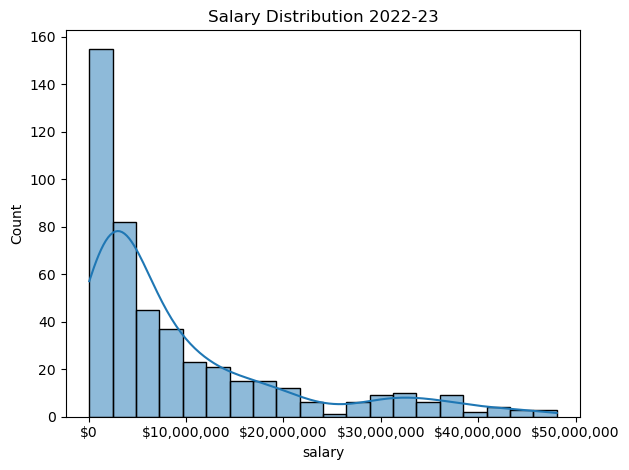

In [4]:
ax = sns.histplot(data = df, x='salary', kde=True, bins = 20)
ax.set(title='Salary Distribution 2022-23')
plt.ticklabel_format(style='plain')
# Format x-axis ticks with dollar signs and commas
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Adjust x-axis tick font size
ax.xaxis.set_tick_params(labelsize=10)  # Adjust the font size as needed
plt.tight_layout()
plt.show()

Our histogram of players' salaries shows a *considerably* right-skewed graph. Just by looking we can see roughly 200 players are earning less than about 5 million. After that it drops off fairly normally, but then has a little bump at just over 30 million and then back down.

Since the distribution is so heavily skewed right, a look at the median will perhaps be more insightful than the mean. We'll split the graphs into the lower 50% and the upper 50% and see what stands out.

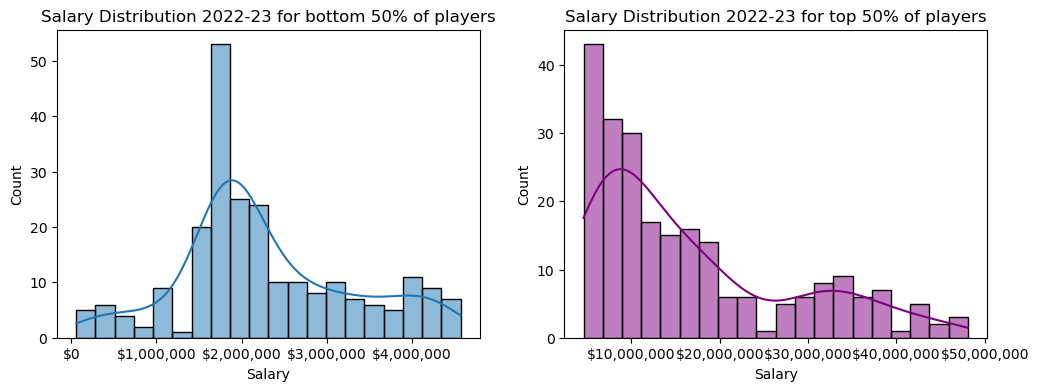

In [5]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'wspace': 0.2})

# Plot 1
medianLess = df.query('salary <= salary.median()')

ax1 = sns.histplot(data=medianLess, x='salary', kde=True, bins=20, ax=axs[0])
ax1.set(title='Salary Distribution 2022-23 for bottom 50% of players')
ax1.ticklabel_format(style='plain')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax1.xaxis.set_tick_params(labelsize=10)
ax1.set_xlabel('Salary')
ax1.set_ylabel('Count')

# Plot 2
medianMore = df.query('salary > salary.median()')

ax2 = sns.histplot(data=medianMore, x='salary', kde=True, bins=20, ax=axs[1], color='purple')
ax2.set(title='Salary Distribution 2022-23 for top 50% of players')
ax2.ticklabel_format(style='plain')
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
ax2.xaxis.set_tick_params(labelsize=10)
ax2.set_xlabel('Salary')
ax2.set_ylabel('Count')

#plt.tight_layout()
plt.show()


These graphs gives us a better look at things.  It appears that a large portion of the players earned between 1.5-2.5 million in 2022-23. A quick look at the NBA Veteran Minimum contract shows that the floor is set at 953,000 for rookies, players with 10 years experience or more receive a minimum of 2.72 million, and everything inbetween for players with years of experience between that. This suggests that a lot of players are making close to their minimum based on what they can be paid by the league.

Another large portion of the players seem to have made just short of 10 million this year. From there we see a normal drop off and then a dip back up at 30-35 million.  The wealth certainly seems to be distributed towards the top players in the league.

In [6]:
# Calculate the mean salary for each position and sort by descending mean salary
positionMean = df[['salary', 'Pos']].groupby(['Pos']).mean().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Mean Salary by Position'
positionMean.rename(columns={'salary': 'Mean Salary by Position'}, inplace=True)
# Format mean salary values as currency with commas
positionMean['Mean Salary by Position'] = positionMean['Mean Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the mean salary DataFrame
positionMean = positionMean.style.set_properties(**{'text-align': 'center'})

# Calculate the median salary for each position and sort by descending median salary
positionMedian = df[['salary', 'Pos']].groupby(['Pos']).median().sort_values(by='salary', ascending=False).round()
# Rename the 'salary' column to 'Median Salary by Position'
positionMedian.rename(columns={'salary': 'Median Salary by Position'}, inplace=True)
# Format median salary values as currency with commas
positionMedian['Median Salary by Position'] = positionMedian['Median Salary by Position'].apply(lambda x: f'${int(x):,}'.format(x))
# Apply center alignment styling to the median salary DataFrame
positionMedian = positionMedian.style.set_properties(**{'text-align': 'center'})

# Create HTML table for each dataframe
html_table1 = positionMean.to_html()
html_table2 = positionMedian.to_html()

# Add CSS styling for whitespace between dataframes
side_by_side_tables = f'''
    <div style="display: flex;">
        <div style="margin-right: 5%;">{html_table1}</div>
        <div>{html_table2}</div>
    </div>
'''
# Display side by side tables using HTML
display(HTML(side_by_side_tables))

,Mean Salary by Position
Pos,
PG,"$12,183,395"
PF,"$9,403,577"
C,"$9,338,676"
SG,"$8,495,827"
SF,"$8,278,663"
,Median Salary by Position
Pos,
PG,"$5,853,659"
PF,"$4,866,840"


Finally we'll create a boxplot for the salaries to get a different look at the range of salaries, along with a quick observation of any possible outliers.

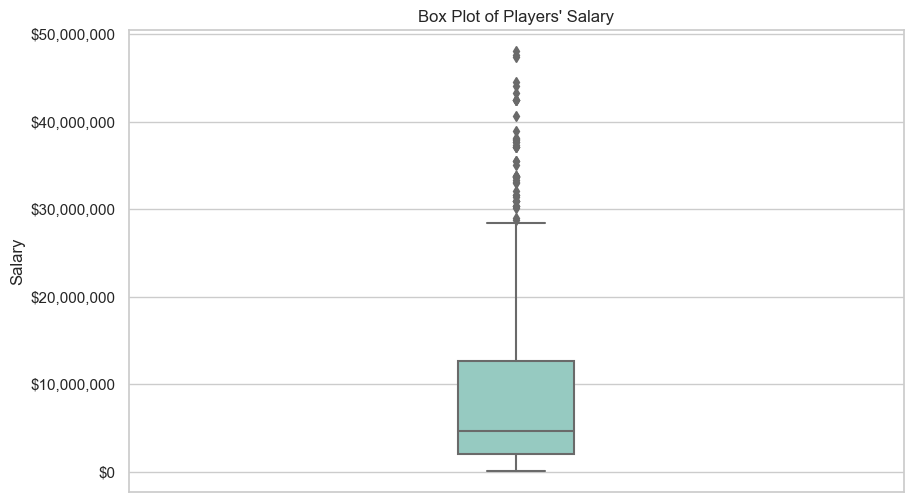

In [7]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))


# Show the plot
plt.show()


The boxplot identifies quite a few outliers actually. Later on we'll calculate what the exact value for an outlier has to exceed to qualify, but for now the boxplot shows that salaries larger than roughly 28 million are outliers.  This makes sense, we can guess that most of those outlier salaries belong to star players, who are the exception not the norm.

### Bivariate and Multivariate Analysis:

Now that we've looked at the distribution of salary, we are interested in what statistics associate with salary the most. We can visualize this with a correlation matrix heatmap to get an idea of how hot or cold each stat is with regards to salary.

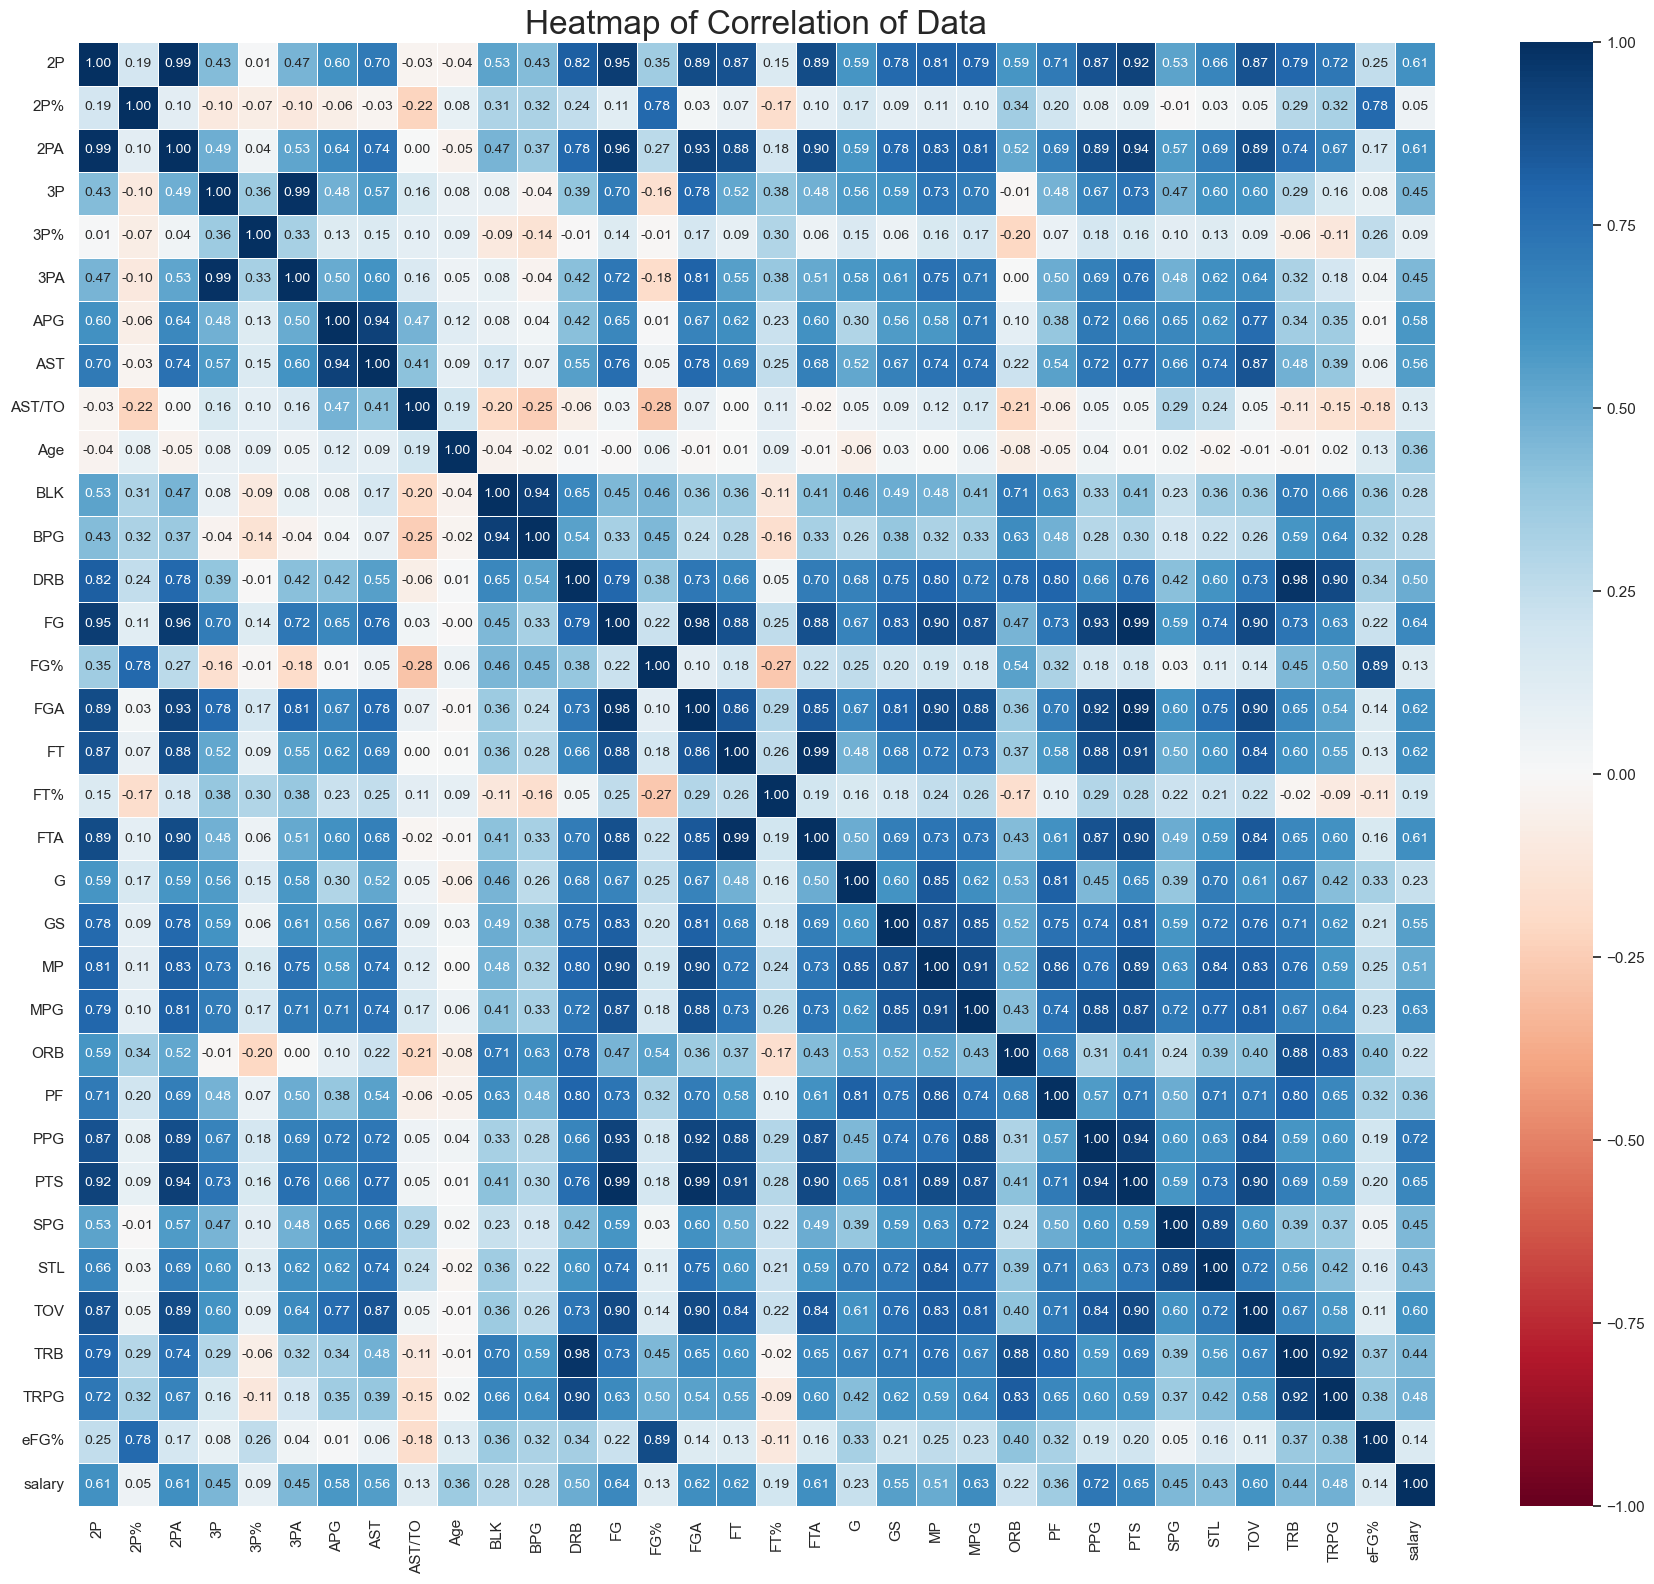

In [8]:
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['dollarPerMinute','dollarPerFG','dollarPerPoint'])
correlation_matrix = correlation_matrix.corr(numeric_only=True)

plt.figure(figsize=(18, 16))  # Set the figure size

# Create the heatmap of correlation matrix with improved layout
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", center=0,
            linewidths=0.5, annot_kws={"size": 10}, vmin=-1, vmax=1)

# Set title
plt.title("Heatmap of Correlation of Data", size=24)
plt.tight_layout()  # Improve layout
plt.show()



Looking along the salary row shows us that Points Per Game (PPG) has the highest value, and the lowest value is 2 Point Percentage (2P%). Let's have a look at a scatterplot of these two values vs salary, then we can grab all the values as a list for further inspection.

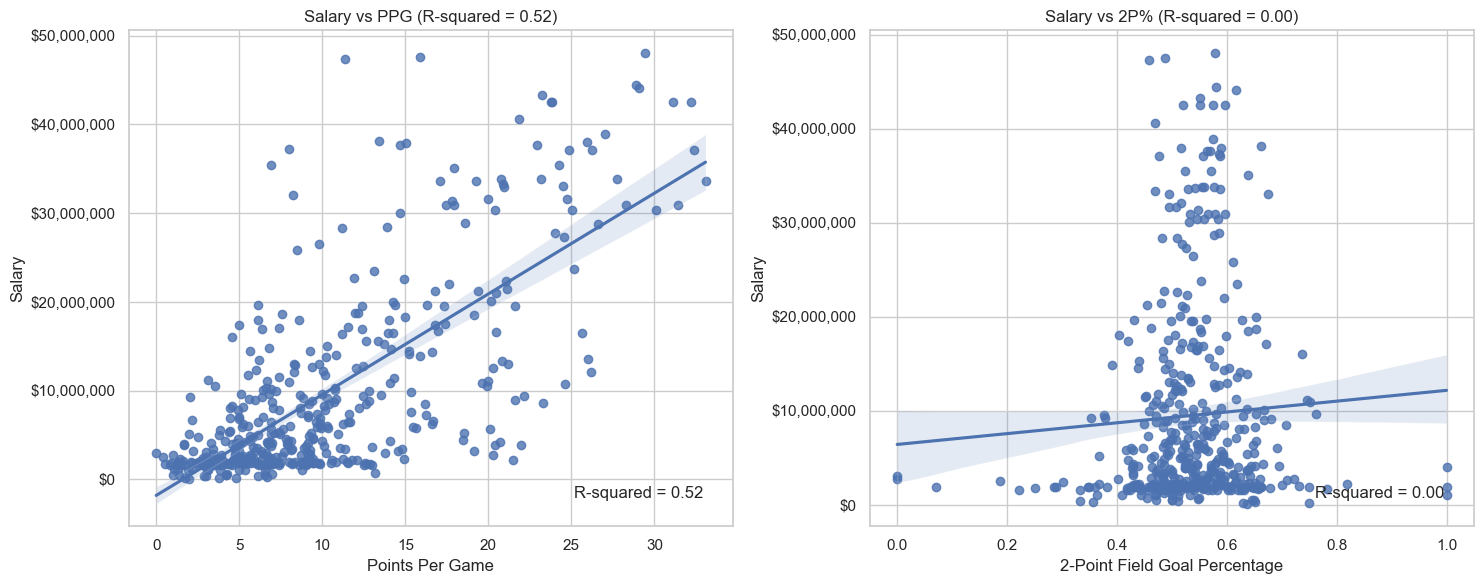

In [9]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter Plot of Salary vs PPG
sns.set(style="whitegrid")
scatter_plot1 = sns.regplot(x="PPG", y="salary", data=df, ax=axes[0])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['PPG'], df['salary'])
r_squared = r_value ** 2
axes[0].set_xlabel("Points Per Game")
axes[0].set_ylabel("Salary")
axes[0].set_title("Salary vs PPG (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot1.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[0].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Plot 2: Scatter Plot of Salary vs 2P%

TwoP = df[df['2P%'].notna()]

sns.set(style="whitegrid")
scatter_plot2 = sns.regplot(x="2P%", y="salary", data=TwoP, ax=axes[1])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(TwoP['2P%'], TwoP['salary'])
r_squared = r_value ** 2
axes[1].set_xlabel("2-Point Field Goal Percentage")
axes[1].set_ylabel("Salary")
axes[1].set_title("Salary vs 2P% (R-squared = {:.2f})".format(r_squared))
ax = scatter_plot2.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
axes[1].text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

Looking at the scatterplot of salary vs ppg we can see a moderate, positive R squared value of 0.52. This means roughly half of salary is explained by PPG.  Meanwhile looking at salary vs 2P%, we have an R squared of 0, which means 2P% explains nothing about one's salary. Of note however, 2P% seems to be pretty evenly distributed around about 55%, perhaps meaning that you need to shoot at least that efficient if you want to stay on the floor.

Now that we've looked at the highest and lowest values in the heatmap, we'll grab a list of all the stats with relation to salary and inspect it.

In [10]:
# Get the top 5 correlations (descending) from the 'All' column
head = salaryCorr[['All']].head(10)
# Rename the 'All' column for the top 5 correlations
head.rename(columns={'All': 'Top 10 Correlation of Salary Descending'}, inplace=True)
# Apply styling to center align the data in the top 5 correlations
head = head.style.set_properties(**{'text-align': 'center'})

# Get the bottom 5 correlations (ascending) from the 'All' column
bottom5 = salaryCorr[['All']].tail(10).sort_values(by='All', ascending=True)
# Rename the 'All' column for the bottom 5 correlations
bottom5.rename(columns={'All': 'Bottom 10 Correlation of Salary Ascending'}, inplace=True)
# Apply styling to center align the data in the bottom 5 correlations
bottom5 = bottom5.style.set_properties(**{'text-align': 'center'})

# Create HTML table for each dataframe
html_table1 = head.to_html()
html_table2 = bottom5.to_html()

# Add CSS styling for whitespace between dataframes
side_by_side_tables = f'''
    <div style="display: flex;">
        <div style="margin-right: 5%;">{html_table1}</div>
        <div>{html_table2}</div>
    </div>
'''
# Display side by side tables using HTML
display(HTML(side_by_side_tables))

,Top 10 Correlation of Salary Descending
PPG,0.722858
PTS,0.652559
FG,0.643683
MPG,0.630499
FGA,0.623244
FT,0.621678
FTA,0.613507
2PA,0.610352
2P,0.608308
TOV,0.595574


The top 10 stats most correlated with scoring are all to do with scoring, scoring attempts, and oddly turnovers.  An explanation for turnovers being so high is that the players who make and score the most have the ball in their hands most of the time, and therefore the more often you have the ball the more you'll turn over the ball.  If the ball isn't in your hands you can't score, so it just comes with the territory.

Conversely, the bottom 10 stats consist of 5 shooting effiency stats, blocks, offensive rebounds, assist to turnover ratio, and interestingly enough number of games played. Since player's contracts are guaranteed the games played stat is probably offset by players who were injured and still received large paycheques from conracts they signed previously.

The immediate impression we can take away that with regards to salary is it doesn't matter how efficent you are, it's about how much pure volume you are able to score.

While it's clear that pure scoring volume is the most important thing where salary is involved across the league, it's worth investigating if anything changes per position.  For example, a Point Guard has a vastly different responsiblity on the floor than the Center does.  We can expect scoring to stay constant amongst positions, but we might suspect that assists could crack the top 5 for Point Guards, and perhaps blocks for Centers.

**Top 5 Stats correlated with Salary Descending**

In [11]:
# Create HTML table for each dataframe with a bit of padding
html_table1 = salaryCorr[['PG']].nlargest(5, 'PG').to_html(classes="dataframe", border=0, justify="left")
html_table2 = salaryCorr[['SG']].nlargest(5, 'SG').to_html(classes="dataframe", border=0, justify="left")
html_table3 = salaryCorr[['SF']].nlargest(5, 'SF').to_html(classes="dataframe", border=0, justify="left")
html_table4 = salaryCorr[['PF']].nlargest(5, 'PF').to_html(classes="dataframe", border=0, justify="left")
html_table5 = salaryCorr[['C']].nlargest(5, 'C').to_html(classes="dataframe", border=0, justify="left")

# Add CSS styling for relative whitespace between dataframes
side_by_side_tables = f'''
    <div style="display: flex;">
        <div style="margin-right: 5%;">{html_table1}</div>
        <div style="margin-right: 5%;">{html_table2}</div>
        <div style="margin-right: 5%;">{html_table3}</div>
        <div style="margin-right: 5%;">{html_table4}</div>
        <div>{html_table5}</div>
    </div>
'''

# Display side by side tables using HTML
display(HTML(side_by_side_tables))

,PG
PPG,0.663703
PTS,0.624945
FG,0.617011
APG,0.611871
MPG,0.608759
,SG
PPG,0.707760
PTS,0.660861
FGA,0.651549
FG,0.650419


Indeed, the criteria for financial success in the NBA *does* differ per position. Of course PPG stays at the top, but there are differences in stats and also rankings per position worth noting

- **Point Guards** Assists per Game (APG) is the first new stat and it comes in at 4th, like we suspected it might. This means that while the era of the "score first" point guard is indeed here, it's beneficial for Point Guards to find teammates who are able to generate them assists.

- **Shooting Guards** as expected are paid for their shooting. Klay Thompson once said "They pay me to shoot", and he indeed wasn't lying. Field Goal attempts are ranked 3rd above, even Field Goals made. Finally, the number of 3 point shot made rounds out the top 5, starting to show some of the importance of the 3 point shot in regards to salary. Intuitively this makes sense for the position, a shooting guard should be expected to score from all distances.

- **Small Forwards** have APG ranked 2nd, which is even higher than the PG position, that's interesting for sure. Back in the 90s Scottie Pippen pioneered the "Point Forward" position with Michael Jordan's Chicago Bulls, and it seems the position has evolved even more to the current day. Perhaps it is expected for the PG to be able to create assists, and in SFs it's financialy rewarded because it's a rarer skill at the position.

- **Power Forwards** also have APG in second. It's interesting to see APG be Top 5 in 3 of the 5 positions, yet absent in the top 10 for when ranking all positions.

- **Center** contains all the stats from the league wide top 5, albeit in a different order. Notably however is the whopping 0.81 correlation that PPG has at the Center position, meaning that this position is all about scoring no matter how.

**Bottom 5 Stats correlated with Salary Ascending**

In [12]:
# Create HTML table for each dataframe with a bit of padding
html_table1 = salaryCorr[['PG']].nsmallest(5, 'PG').to_html(classes="dataframe", border=0, justify="left")
html_table2 = salaryCorr[['SG']].nsmallest(5, 'SG').to_html(classes="dataframe", border=0, justify="left")
html_table3 = salaryCorr[['SF']].nsmallest(5, 'SF').to_html(classes="dataframe", border=0, justify="left")
html_table4 = salaryCorr[['PF']].nsmallest(5, 'PF').to_html(classes="dataframe", border=0, justify="left")
html_table5 = salaryCorr[['C']].nsmallest(5, 'C').to_html(classes="dataframe", border=0, justify="left")

# Add CSS styling for relative whitespace between dataframes
side_by_side_tables = f'''
    <div style="display: flex;">
        <div style="margin-right: 5%;">{html_table1}</div>
        <div style="margin-right: 5%;">{html_table2}</div>
        <div style="margin-right: 5%;">{html_table3}</div>
        <div style="margin-right: 5%;">{html_table4}</div>
        <div>{html_table5}</div>
    </div>
'''

# Display side by side tables using HTML
display(HTML(side_by_side_tables))

,PG
AST/TO,0.021931
3P%,0.040985
FT%,0.193964
G,0.232153
2P%,0.283388
,SG
AST/TO,0.001126
2P%,0.033498
FT%,0.142300
FG%,0.194122


### Outlier Detection:

Recall our boxplot from the univariate analysis section.

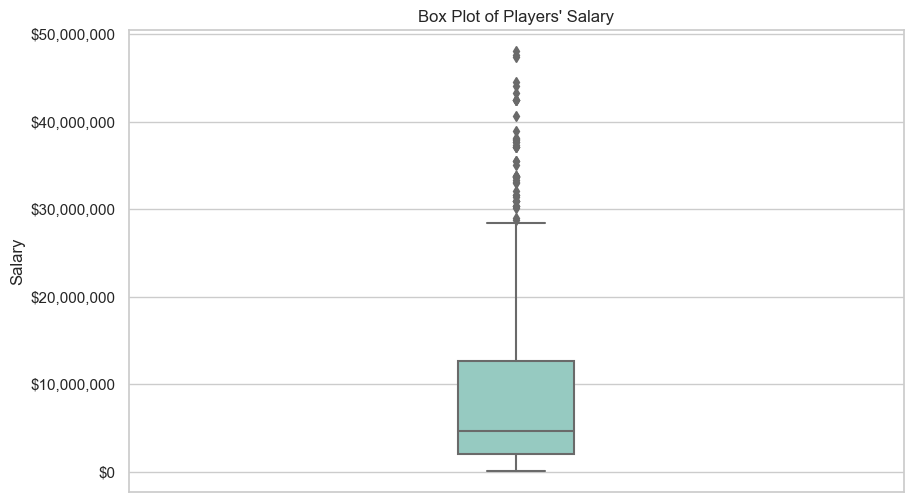

In [13]:
# Create a box plot using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style="whitegrid")   # Set the style of the plot

# Create the box plot
ax = sns.boxplot(y="salary", data=df, palette="Set3", width=0.15)

# Add labels and title
plt.ylabel("Salary")
plt.title("Box Plot of Players' Salary")
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"${int(x):,}"))

# Show the plot
plt.show()


This graph indicated that any salary larger than roughly 28 million was an outlier. Here we will computer the outlier value for ourselves and compare it, along with have a look at any and all players that are considered outliers.

In [14]:
print(f'${outlier_calc:,.2f}')

$41,912,145.54


Our calculation of an outlier has a much higher value, putting the threshold at a salary greater than 41.9 million.  Intuitively that probably makes more sense, since the distribution showed us there was actually a jump in the number of salaries in the 30 million range.

Lets look at the players that have salaries considered to be outliers and see if there's anything we can identify about them.

In [15]:
outlier_players = df2.query('salary > @outlier_calc')
outlier_players.loc[:, ['Tm', 'Pos', 'Age', 'salary', 'G', 'MPG', 'PPG', '2P%','3P%','eFG%', 'FG%', 'FT%', 'AST/TO','APG', 'TRPG']].round(2)

,Tm,Pos,Age,salary,G,MPG,PPG,2P%,3P%,eFG%,FG%,FT%,AST/TO,APG,TRPG
Player,,,,,,,,,,,,,,,
Giannis Antetokounmpo,MIL,PF,28,42492492,63,32.13,31.10,0.60,0.28,0.57,0.55,0.64,1.46,5.70,11.78
Bradley Beal,WAS,SG,29,43279250,50,33.46,23.20,0.55,0.36,0.55,0.51,0.84,1.87,5.42,3.92
Stephen Curry,GSW,PG,34,48070014,56,34.66,29.43,0.58,0.43,0.61,0.49,0.92,1.97,6.29,6.09
Kevin Durant,TOT,PF,34,44119845,47,35.57,29.06,0.62,0.40,0.61,0.56,0.92,1.51,5.00,6.66
Paul George,LAC,SG,32,42492492,56,34.62,23.79,0.52,0.37,0.54,0.46,0.87,1.64,5.14,6.11
LeBron James,LAL,PF,38,44474988,55,35.53,28.91,0.58,0.32,0.55,0.50,0.77,2.11,6.82,8.31
Kawhi Leonard,LAC,SF,31,42492492,52,33.62,23.83,0.55,0.42,0.57,0.51,0.87,2.32,3.92,6.50
Damian Lillard,POR,PG,32,42492492,58,36.33,32.17,0.57,0.37,0.56,0.46,0.91,2.23,7.33,4.78
John Wall,LAC,PG,32,47345760,34,22.21,11.35,0.46,0.30,0.46,0.41,0.68,2.22,5.24,2.71


Some notable observations of the outliers:
- Of the 10 outliers, 4 of them are point guards. This helps explain why the point guard mean salary is so high compared to the other positions. 
- 8 players are over the age of 30, with LeBron James being the oldest at 38. This is encouraging for younger players hoping to be able to earn as they age over time.
- 2 of these players, Russell Westbrook and John Wall, have a much lower PPG than the others. They are both over 30, so it's possible that these players are near the end of a max contract they signed back in their "prime", or perhaps they got injured and haven't been able to play relative to their earnings.
- There are no Centers in the list of outliers. The Center position had the 3rd highest mean salary and the 4th highest median salary.

### Categorical Variables:


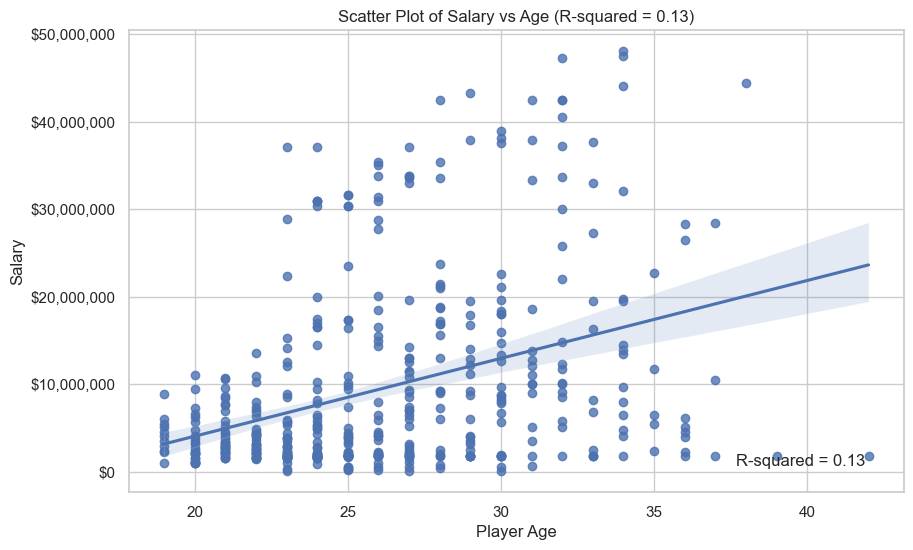

In [16]:
# Set the figure size and style of the plot
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   
# Create the scatter plot
scatter_plot = sns.regplot(x="Age", y="salary", data=df)
# Calculate the linear regression parameters
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['Age'], df['salary'])
r_squared = r_value ** 2
# Add labels and title
plt.xlabel("Player Age")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary vs Age (R-squared = {:.2f})".format(r_squared))
# Customize legend
ax = scatter_plot.axes
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
# Display R-squared value on the plot
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')
# Show the plot
plt.show()

There is a weaker than expected relationship between salary and a player's age.  Although players younger than about 23 struggled to break the 10 million a year mark, at about 24 salary takes off and doesn't drop until much later (after 37 or so). This can be explained through a look at how NBA rookie contracts work.  Players selected in the first round of the NBA draft are signed to standard deals that are 2 years long, with the team retaining the option to extend that rookie contract for up to an additional 2 years if they wish.  After that, players and teams are able to engage in contract extensions, which allow the player to re-sign a player up to 35 percent of the salary cap with 8 percent escalation in each subsequent year.  This explains the salary take off at about 24, players are done with their rookie contract and the rising stars worth big extensions get them signed and see an explosion in salary.

From that point on salaries are tied to the league's salary cap as a percentage and/or up to 105% of the player's salary for the previous season. This means that players who are able to keep up their level of play later in to their thirties can continue to receive increasing contract offers and extensions. It seems that age has less of a bearing on salary than perhaps it used to. 

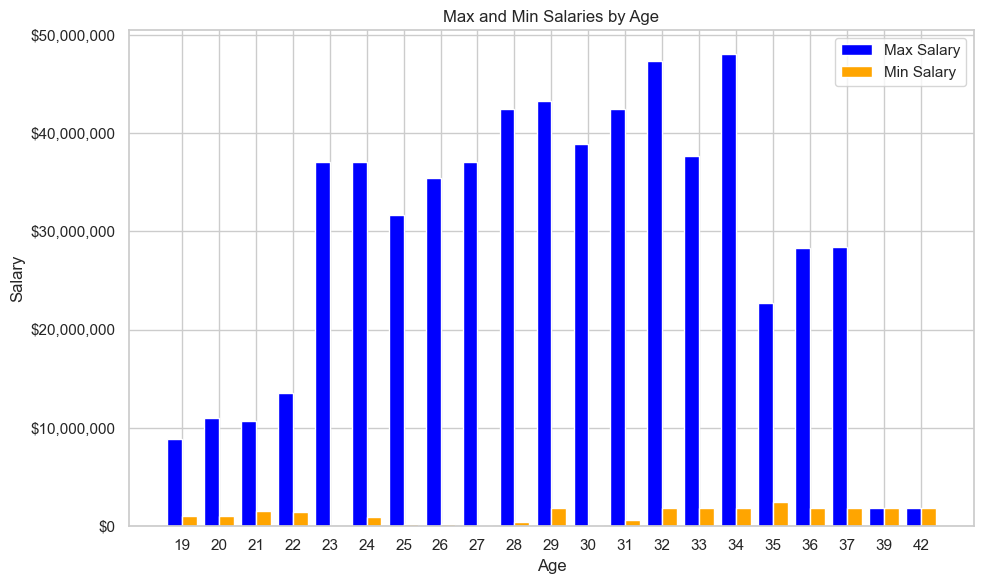

In [17]:
min_salary_indices = df.groupby('Age')['salary'].idxmin()
max_salary_indices = df.groupby('Age')['salary'].idxmax()

test_max = df.loc[max_salary_indices, ['Age', 'salary']]
test_min = df.loc[min_salary_indices, ['Age', 'salary']]
test_min = test_min[test_min['Age'] != 38]

# Combine the data for plotting
combined_data = test_max.merge(test_min, on='Age', suffixes=('_max', '_min'))

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a grouped bar plot with bars beside each other
bar_width = 0.4  # Adjust the bar width to your preference

ages = np.arange(len(combined_data))
sal_plot = plt.bar(ages, combined_data['salary_max'], width=bar_width, color='blue', label='Max Salary')
sal_plot = plt.bar(ages + bar_width, combined_data['salary_min'], width=bar_width, color='orange', label='Min Salary')

plt.xticks(ages + bar_width / 2, combined_data['Age'])
plt.xlabel('Age')
plt.ylabel('Salary')

# Customize y-axis tick formatting as dollar values
def dollar_format(x, pos):
    return '${:,.0f}'.format(x)

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(dollar_format))

plt.title('Max and Min Salaries by Age')
plt.legend()

plt.tight_layout()
plt.show()


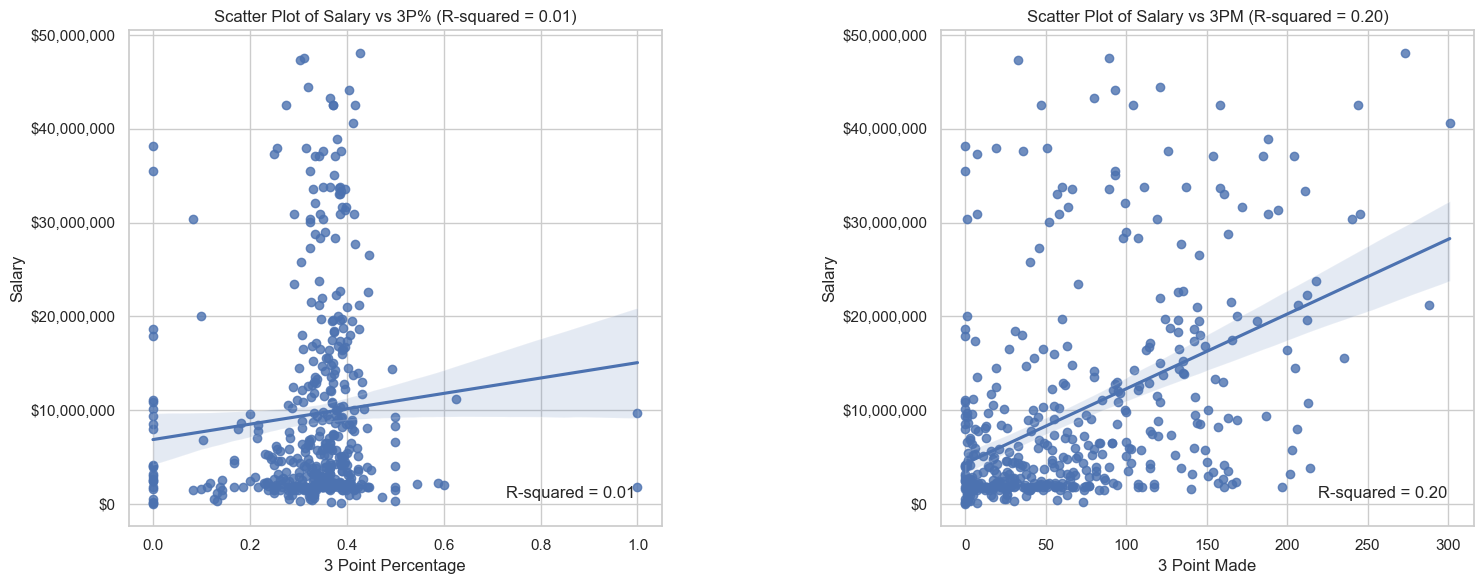

In [18]:
# Filter the data
result = df[df['3P%'].notna()]

# Set the figure size and style of the plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # Creating a 1x2 grid of subplots
sns.set(style="whitegrid")

# Create the first scatter plot
scatter_plot1 = sns.regplot(x="3P%", y="salary", data=result, ax=axes[0])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P%'], result['salary'])
r_squared = r_value ** 2
axes[0].set_xlabel("3 Point Percentage")
axes[0].set_ylabel("Salary")
axes[0].set_title("Scatter Plot of Salary vs 3P% (R-squared = {:.2f})".format(r_squared))
ax0 = scatter_plot1.axes
ax0.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax0.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')

# Create the second scatter plot
scatter_plot2 = sns.regplot(x="3P", y="salary", data=result, ax=axes[1])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(result['3P'], result['salary'])
r_squared = r_value ** 2
axes[1].set_xlabel("3 Point Made")
axes[1].set_ylabel("Salary")
axes[1].set_title("Scatter Plot of Salary vs 3PM (R-squared = {:.2f})".format(r_squared))
ax1 = scatter_plot2.axes
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
plt.text(0.95, 0.05, f'R-squared = {r_squared:.2f}', transform=ax1.transAxes, fontsize=12,
         verticalalignment='bottom', horizontalalignment='right')

# Adjust layout
plt.tight_layout()

# Show the combined subplot
plt.show()


Surprisingly, 3 point percentage has almost no relationship with salary.  The mean 3P% seems to be about 33%, and really has no bearing on how much a player gets paid. Considering the emphasis on 3 point shooting we might have expected salary to be tied closer to 3P%, but clearly this is not the case.

Looking at the total number of 3 point shots made has a closer relationship with salary. What this could suggest is that it matters less if you're an accurate shooter who doesn't shoot often, versus being less efficient but letting it fly.  While 3 point shooting has been overall more emphasized in the league, it's probably safe to assume that the Center position is asked to shoot it less than the PG and SG positions are. It might be worth investigating this relationship by each position to see if there's more to see.